In [1]:
import glob
import os, sys, subprocess
import ROOT as rt
import re

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.18/02


In [2]:
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_nJetsLT3_DNN/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_skimmed/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/Zhicai_fromHadoop_skim_noBDT/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fullbkg_PtGT70_QCDonly/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fullbkg_PtGT70/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fullbkg_PtGT70_adv/'
#indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/skim_analyzer_output_reproduce_minimalCut/'
indir1 = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/'
filelist = glob.glob(indir1+'/*.root')
#data_DNN = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fromZhicai_nJetsLT3_DNN/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
#data_DNN = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
data_DNN = indir1+'/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
signal_file_name = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_fullbkg_PtGT70//GMSB_L300TeV_Ctau200cm_13TeV-pythia8.root'
all_signal_file = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/preprocessing/GMSB_triggerEffCuts.root'

lumi_2016 = 35922.0
lumi_2017 = 41530.0
lumi = lumi_2016

lambda_points = [200]
ctau_points = [10, 200, 1000]
marker_size = 1

signal_list = []

#backgrounds = ['DiPhoton', 'GJets', 'QCD']
#sample_list = {'QCD': []}
sample_list = {'DiPhoton': [],
               'GJet': [],
               'QCD': [],
                'Z': [],
                'W': [],
                'T': [],
                'tt': []
              }

sample_color = {'DiPhoton': rt.kOrange-2,
                'GJet': rt.kAzure+1,
                'QCD': rt.kMagenta-7,
                'GMSB': rt.kOrange-3,
                'GMSBAll': rt.kBlack,
                'Data': rt.kBlack,
                 'Z': rt.kAzure+10,
                'W': rt.kAzure+10,
                'T': rt.kAzure+10,
                'tt': rt.kAzure+10}



line_color = {'DiPhoton': rt.kGreen+3,
                'GJet': rt.kAzure+3,
                'QCD': rt.kMagenta+3,
                'GMSB': rt.kOrange-3,
                'GMSBAll': rt.kBlack,
                'Data': rt.kBlack,
                 'Z': rt.kAzure+10,
                'W': rt.kAzure+10,
                'T': rt.kAzure+10,
                'tt': rt.kAzure+10}

signal_marker = [39, 41, 43, 45, 47, 48, 49, 21, 22, 23, 29, 33, 34]


signal_color = [rt.kCyan+2,
                rt.kRed,
                rt.kViolet+6,
                rt.kAzure+7,
               rt.kTeal-6,
               rt.kGreen+3,
               rt.kPink+9,
               rt.kMagenta+2,
               rt.kBlue,
               rt.kAzure,
               rt.kSpring+4,
               rt.kYellow-2]

# Create background list
for bkg in sample_list:
    for infile in filelist:
        if 'DelayedPhoton_{}'.format(bkg) in infile.split('/')[-1]:
            sample_list[bkg].append(infile)
            
# Create signal list
for this_lambda in lambda_points:
    for this_ctau in ctau_points:
        for infile in filelist:
            if 'L{}TeV_Ctau{}cm'.format(this_lambda, this_ctau) in infile.split('/')[-1]:
                signal_list.append(infile)


In [20]:
pho_to_plot = 1

features = [
            't1MET','n_Jets', 'HT', 
            'pho{}Pt'.format(pho_to_plot),
            'pho{}ecalPFClusterIso'.format(pho_to_plot), 
            'pho{}hcalPFClusterIso'.format(pho_to_plot),
            'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot), 
            'pho{}R9'.format(pho_to_plot), 
            'pho{}SigmaIetaIeta'.format(pho_to_plot), 
            'pho{}Smajor'.format(pho_to_plot), 
            'pho{}Sminor'.format(pho_to_plot),
            'pho{}ClusterTime_SmearToData'.format(pho_to_plot),
            'pho{}ecalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot), 
            'pho{}hcalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot), 
            'pho{}trkSumPtHollowConeDR03/pho{}Pt'.format(pho_to_plot, pho_to_plot), 
            'pho{}Sminor/pho{}Smajor'.format(pho_to_plot, pho_to_plot),
            'pho{}_genVtxZ'.format(pho_to_plot),
            'R{}'.format(pho_to_plot),
            'pho{}DNN'.format(pho_to_plot)
           ]

feature_names = {
            't1MET': 'p_{T}^{miss} [GeV]',
            'n_Jets': 'N_{jets}',
            'HT': 'HT [GeV]',
            'pho{}Pt'.format(pho_to_plot): '#gamma_{%d} p^{T} [GeV]'%(pho_to_plot),
            'pho{}ecalPFClusterIso'.format(pho_to_plot): '#gamma_{%d} EcalPFClusterIso [GeV]'%(pho_to_plot), 
            'pho{}hcalPFClusterIso'.format(pho_to_plot): '#gamma_{%d} HcalPFClusterIso [GeV]'%(pho_to_plot),
            'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): '#gamma_{%d} TrkSumPtHollowConeDR03 [GeV]'%(pho_to_plot), 
            'pho{}R9'.format(pho_to_plot): '#gamma_{%d} R9'%(pho_to_plot), 
            'pho{}SigmaIetaIeta'.format(pho_to_plot): '#gamma_{%d} #sigma_{i#eta i#eta}'%(pho_to_plot), 
            'pho{}Smajor'.format(pho_to_plot): '#gamma_{%d} S_{major}'%(pho_to_plot), 
            'pho{}Sminor'.format(pho_to_plot): '#gamma_{%d} S_{minor}'%(pho_to_plot),
            'pho{}ClusterTime_SmearToData'.format(pho_to_plot): '#gamma_{%d} cluster time [ns]'%(pho_to_plot),
            'pho{}ecalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): '#gamma_{%d} #frac{EcalPFClusterIso)}{p^{T}}'%(pho_to_plot), 
            'pho{}hcalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): '#gamma_{%d} #frac{HcalPFClusterIso}{p^{T}}'%(pho_to_plot),  
            'pho{}trkSumPtHollowConeDR03/pho{}Pt'.format(pho_to_plot, pho_to_plot): '#gamma_{%d} #frac{TrkSumPtHollowConeDR03}{p^{T}}'%(pho_to_plot),  
            'pho{}Sminor/pho{}Smajor'.format(pho_to_plot, pho_to_plot): '#gamma_{%d} S_{minor}/S_{major}'%(pho_to_plot),
            'pho{}_genVtxZ'.format(pho_to_plot): 'Gen #gamma_{%d} vertex Z [cm]'%(pho_to_plot),
            'R{}'.format(pho_to_plot): 'Gen #gamma_{%d} vertex R [cm]'%(pho_to_plot),
            'pho{}DNN'.format(pho_to_plot): '#gamma_{%d} DNN score'%(pho_to_plot)
            }

xranges = {'t1MET': (0., 200),
           'n_Jets': (0, 5),
            'HT': (0, 800),
           'pho1Pt': (50, 400),
           'pho{}ecalPFClusterIso'.format(pho_to_plot): (0,15),
           'pho{}hcalPFClusterIso'.format(pho_to_plot): (0, 15),
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): (0,15),
           'pho{}R9'.format(pho_to_plot): (0.80,1.),
           'pho{}SigmaIetaIeta'.format(pho_to_plot): (0, 0.03),
           'pho{}Smajor'.format(pho_to_plot): (0, 1.5),
           'pho{}Sminor'.format(pho_to_plot): (0., 0.7),
           'pho{}ClusterTime_SmearToData'.format(pho_to_plot): (-2, 6),
           'pho{}angle_xtal'.format(pho_to_plot): (0, 1.),
           'pho{}_genVtxZ'.format(pho_to_plot): (-100, 100),
           'R{}'.format(pho_to_plot): (0, 100),
           'pho{}ecalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): (0, 1.),
           'pho{}hcalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): (0, 1.),
            'pho{}trkSumPtHollowConeDR03/pho{}Pt'.format(pho_to_plot, pho_to_plot): (0, 1.), 
            'pho{}Sminor/pho{}Smajor'.format(pho_to_plot, pho_to_plot): (0, 1),
           'pho{}DNN'.format(pho_to_plot): (0, 1)
}

useLogY = {'t1MET': False,
           'n_Jets': False,
           'HT': False,
           'pho1Pt': False,
           'pho{}ecalPFClusterIso'.format(pho_to_plot): True,
           'pho{}hcalPFClusterIso'.format(pho_to_plot): True,
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): True,
           'pho{}R9'.format(pho_to_plot): False,
           'pho{}SigmaIetaIeta'.format(pho_to_plot): True,
           'pho{}Smajor'.format(pho_to_plot): True,
           'pho{}Sminor'.format(pho_to_plot): True,
           'pho{}ClusterTime_SmearToData'.format(pho_to_plot): True, 
           'pho{}angle_xtal'.format(pho_to_plot): True,
           'pho{}_genVtxZ'.format(pho_to_plot): False,
           'pho{}ecalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): True,
            'pho{}hcalPFClusterIso/pho{}Pt'.format(pho_to_plot, pho_to_plot): True,
            'pho{}trkSumPtHollowConeDR03/pho{}Pt'.format(pho_to_plot, pho_to_plot): True,
           'R{}'.format(pho_to_plot): False,
           'pho{}DNN'.format(pho_to_plot): True
}

textPosition = {'t1MET': (100, 10000),
                'n_Jets': (2, 1e4),
                'HT': (1000, 1e4),
                'pho1Pt': (200, 1e4),
           'pho{}ecalPFClusterIso'.format(pho_to_plot): (1, 1.5e4),
           'pho{}hcalPFClusterIso'.format(pho_to_plot): (3, 3e4),
           'pho{}trkSumPtHollowConeDR03'.format(pho_to_plot): (3, 3e4),
           'pho{}R9'.format(pho_to_plot): (0.905, 7000),
           'pho{}SigmaIetaIeta'.format(pho_to_plot): (0.001, 2e3),
           'pho{}Smajor'.format(pho_to_plot): (1, 3e4),
           'pho{}Sminor'.format(pho_to_plot): (0.4, 1e4),
           'pho{}ClusterTime_SmearToData'.format(pho_to_plot): (1,3e4),
           'pho{}angle_xtal'.format(pho_to_plot): (0, 0),
           'pho{}_genVtxZ'.format(pho_to_plot): (0, 0),
           'R{}'.format(pho_to_plot): (0,0),
           'pho{}DNN'.format(pho_to_plot): (0.7, 8e3)
}

In [4]:
def getXS(sample):
    with open("/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/data/all_bkg_back.list", "r") as xsfile:
        allxs = xsfile.readlines()
        for xs in allxs:
            if xs.split(' ')[0] in sample:
                return xs.split(' ')[-1].replace('\n','')
    print("[WARNING] {} cross section not found".format(sample))
    return 0

def extract_num(string):
    sample_num = list(map(int, re.findall(r'\d+', string.split('/')[-1])))
    if len(sample_num) > 1:
        sample_lambda, sample_ctau = sample_num[0], sample_num[1]
        if sample_ctau == 0:
            if "0_001cm" in string:
                sample_ctau = 0.001
            elif "0_01cm" in string:
                sample_ctau = 0.01
            elif "0_1cm" in string:
                sample_ctau = 0.1

        return sample_lambda, sample_ctau
    else:
        print("Can't extract number from {}".format(string))
        return 0, 0

def getSignalXS(sample):
    """Get cross section x BR for signal MC"""
    sample_lambda, sample_ctau = extract_num(sample)

    dat_file = "/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/data/XsecBR.dat"
    with open(dat_file, "r") as xsfile:
        allxs = xsfile.readlines()
        for xs in allxs[1:]:
            this_lambda, this_ctau = extract_num(xs)
            if sample_lambda == this_lambda and sample_ctau == this_ctau:
                return float(xs.split(' ')[4])
    print("[WARNING] {} cross section not found in {}".format(sample, dat_file))
    return 0

In [5]:
hstack = {}
hist_list = {}
signal_hist_list = {}
signal_hist = {}
allsn_hist = {}
data_hist = {}
QCD_scale = 2.5
signal_scale = 1.

for fea in features:
    fea_name = fea
    if '/' in fea:
        fea_name = fea.replace('/','_over_')
    print("Processing {}".format(fea))
    hstack[fea] = rt.THStack("hstack[{}]".format(fea),"")
    hist_list[fea] = []
    signal_hist_list[fea] = []

    sample_index = {"DiPhoton": None,
                    "GJet": None,
                    "QCD": None,
                    "Z": None,
                    'W': None,
                    'T': None,
                    'tt': None}
    counter = 0
    
    event_cut = 'n_Photons == 2 && \
                 HLTDecision[81] == 1'

    pho_cut = '&& pho1Pt > 70 && abs(pho1Eta)<1.4442 \
                && abs(pho1HoverE) < 0.08 \
                && pho1R9 > 0.85 && abs(pho1SigmaIetaIeta) < 0.024 \
                && pho1passEleVeto'# \
                #&& (!pho1passIsoTight_comboIso)'
    pho2_cut = '&& pho2SigmaIetaIeta < 0.03 \
            && pho2HoverE < 0.1 \
            && pho2ecalPFClusterIso < 30.0 \
            && pho2sumNeutralHadronEt < 30.0 \
            && pho2trkSumPtHollowConeDR03 < 30.0'
    
    pho_cut += pho2_cut 
    
    nbins = 30
    if 'n_Jets' in fea: nbins = 5
    for sample in sample_list:
        for i, bkg_file in enumerate(sample_list[sample]):
            print("Reading {}".format(bkg_file))
            xs = getXS(bkg_file)
            tmp_file = rt.TFile.Open(bkg_file, "READ")
            tmp_tree = tmp_file.Get("DelayedPhoton")
            tmp_sw = tmp_file.Get("SumWeights")
            sumWeights = tmp_sw.Integral()
            #print("--- xs = {}".format(xs))
            
            if xs and xs != 0:
                if sample_index[sample] is None:
                    sample_index[sample] = counter
                
                hist_list[fea].append(rt.TH1F("hist[{}]{}".format(fea_name, counter), 
                                              "{}; {}".format(sample, fea), nbins, xranges[fea][0], xranges[fea][1]))

                hist_list[fea][-1].Sumw2()
                
                met_cut = " && Flag_HBHENoiseFilter == 1 && Flag_HBHEIsoNoiseFilter ==1 && \
                       Flag_goodVertices == 1 && Flag_eeBadScFilter == 1 && \
                       Flag_EcalDeadCellTriggerPrimitiveFilter == 1 && \
                       Flag_CSCTightHaloFilter == 1  && \
                       Flag_badMuonFilter == 1 && Flag_badGlobalMuonFilter == 0 && \
                       Flag_duplicateMuonFilter == 0 "
                xsecOverSumweights = float(xs)/sumWeights
                if 'QCD' in sample: xsecOverSumweights *= QCD_scale
                weight_selection = "({event_cut} {pho_cut}) * (weight * \
                                    pileupWeight * triggerEffSFWeight *photonEffSF * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
                                                                                        pho_cut = pho_cut,
                                                                                        met_cut=met_cut,
                                                                                        lumi=lumi,
                                                                                        xsecOverSumweights=xsecOverSumweights)
#                 weight_selection = "(HLTDecision[81] == 1) * (weight * \
#                                     pileupWeight * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
#                                                                                         pho_cut = pho_cut,
#                                                                                         met_cut=met_cut,
#                                                                                         lumi=lumi,
#                                                                                         xsecOverSumweights=xsecOverSumweights)

                tmp_tree.Draw("{}>>hist[{}]{}".format(fea, fea_name, counter), weight_selection)
                hist_list[fea][-1].SetDirectory(0)
#                 print("{}\n\tWeighted sum events = {:.2f}\n\txs = {}\n\txs/sumWeight = {}".format(bkg_file, 
#                                                                            hist_list[fea][-1].Integral(),
#                                                                            xs, xsecOverSumweights))
                hist_list[fea][-1].SetFillColor(sample_color[sample])
                hist_list[fea][-1].SetLineColor(sample_color[sample])
                hstack[fea].Add(hist_list[fea][-1])
                counter += 1
                tmp_file.Close()
                del tmp_file, tmp_tree, tmp_sw

    # Get signal histograms            
    for i, signal in enumerate(signal_list):
        print("Reading {}".format(signal))
        xs = getSignalXS(signal.split('/')[-1])
        tmp_file = rt.TFile.Open(signal, "READ")
        tmp_tree = tmp_file.Get("DelayedPhoton")
        tmp_sw = tmp_file.Get("SumWeights")
        sumWeights = tmp_sw.Integral()
        xsecOverSumweights = float(xs)/sumWeights
        
        this_lambda, this_ctau = extract_num(signal)
        signal_hist_list[fea].append(rt.TH1F("signal_hist_{}_{}_{}".format(fea_name, this_lambda, this_ctau), 
                                             "{}".format(fea), nbins, 
                                             xranges[fea][0], xranges[fea][1]))
        signal_hist_list[fea][-1].Sumw2()
        weight_selection = "({event_cut} {pho_cut}) * (weight * \
                            pileupWeight * triggerEffSFWeight * \
                            photonEffSF * {lumi} * \
                            {xsecOverSumweights} * \
                            {signal_scale})".format(event_cut=event_cut,
                                                        pho_cut = pho_cut,
                                                        met_cut=met_cut,
                                                        lumi=lumi,
                                                        xsecOverSumweights=xsecOverSumweights,
                                                        signal_scale=signal_scale)
        
        tmp_tree.Draw("{}>>signal_hist_{}_{}_{}".format(fea, fea_name, this_lambda, this_ctau), weight_selection)
        signal_hist_list[fea][-1].SetDirectory(0)
        signal_hist_list[fea][-1].SetLineColor(signal_color[i])
        signal_hist_list[fea][-1].SetLineWidth(2)
#         signal_hist_list[fea][-1].SetMarkerColor(signal_color[i])
#         signal_hist_list[fea][-1].SetMarkerStyle(signal_marker[i])
        tmp_file.Close()
        del tmp_file, tmp_tree, tmp_sw

            
            
    # Get data histogram
    event_cut = 'n_Photons == 2 && \
                 HLTDecision[81] == 1 && \
                 n_Jets < 3'
        
    data_file = rt.TFile.Open(data_DNN, "READ")
    data_tree = data_file.Get("DelayedPhoton")

    data_hist[fea] = rt.TH1F("data_hist[{}]".format(fea_name), 
                              "{}; {}".format(sample, fea), 
                              nbins, xranges[fea][0], xranges[fea][1])
    data_hist[fea].Sumw2()
    weight_selection = "({event_cut} {pho_cut})".format(event_cut=event_cut,
                                                        pho_cut = pho_cut,
                                                        )
    data_tree.Draw("{}>>data_hist[{}]".format(fea, fea_name), weight_selection)
    data_hist[fea].SetDirectory(0)
#     print("{}\n\tWeighted sum events = {:.2f}\n\txs/sumWeight = {}".format(all_signal_file, 
#                                                                allsn_hist[fea].Integral(),
#                                                                xsecOverSumweights))
    data_hist[fea].SetFillColor(sample_color['GMSBAll'])
    data_hist[fea].SetLineColor(sample_color['GMSBAll'])
    data_hist[fea].SetLineWidth(2)
    data_hist[fea].SetMarkerStyle(20)
    
    
    
#     # Get signal histogram
#     xs = getSignalXS(signal_file_name)
#     signal_file = rt.TFile.Open(signal_file_name, "READ")
#     signal_tree = signal_file.Get("DelayedPhoton")
#     signal_sw = signal_file.Get("SumWeights")
#     sumWeights = signal_sw.Integral()
#     xsecOverSumweights = float(xs)/sumWeights

#     signal_hist[fea] = rt.TH1F("hist_signal[{}]".format(fea), 
#                                "{}; {}".format(sample, fea), 
#                                100, xranges[fea][0], xranges[fea][1])
#     weight_selection = "(HLTDecision[81] == 1) * (weight * \
#                         pileupWeight * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
#                                                                             pho_cut = pho_cut,
#                                                                             met_cut=met_cut,
#                                                                             lumi=lumi,
#                                                                             xsecOverSumweights=xsecOverSumweights)
#     signal_tree.Draw("{}>>hist_signal[{}]".format(fea, fea), weight_selection)
#     signal_hist[fea].SetDirectory(0)
#     print("{}\n\tWeighted sum events = {:.2f}\n\txs = {}\n\txs/sumWeight = {}".format(signal_file, 
#                                                                signal_hist[fea].Integral(),
#                                                                xs, xsecOverSumweights))
#     signal_hist[fea].SetFillColor(sample_color['GMSB'])
#     signal_hist[fea].SetLineColor(sample_color['GMSB'])
#     signal_hist[fea].SetLineWidth(2)
#     signal_hist[fea].Scale(50000)

#     # Get all signal histogram
#     allsn_file = rt.TFile.Open(all_signal_file, "READ")
#     allsn_tree = allsn_file.Get("DelayedPhoton")
#     allsn_sw = allsn_file.Get("SumWeights")
#     sumWeights = allsn_sw.Integral()
#     xsecOverSumweights = allsn_tree.GetEntries()/sumWeights

#     allsn_hist[fea] = rt.TH1F("all_hist_signal[{}]".format(fea), 
#                               "{}; {}".format(sample, fea), 
#                               100, xranges[fea][0], xranges[fea][1])
#     weight_selection = "(HLTDecision[81] == 1) * (weight * \
#                         pileupWeight * {lumi} * {xsecOverSumweights})".format(event_cut=event_cut,
#                                                                             pho_cut = pho_cut,
#                                                                             met_cut=met_cut,
#                                                                             lumi=lumi,
#                                                                             xsecOverSumweights=xsecOverSumweights)
#     allsn_tree.Draw("{}>>all_hist_signal[{}]".format(fea, fea), weight_selection)
#     allsn_hist[fea].SetDirectory(0)
#     print("{}\n\tWeighted sum events = {:.2f}\n\txs/sumWeight = {}".format(all_signal_file, 
#                                                                allsn_hist[fea].Integral(),
#                                                                xsecOverSumweights))
#     allsn_hist[fea].SetFillColor(sample_color['GMSBAll'])
#     allsn_hist[fea].SetLineColor(sample_color['GMSBAll'])
#     allsn_hist[fea].SetLineWidth(2)
#     allsn_hist[fea].Scale(1./10000.)

Processing t1MET
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_M40_80-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
[WARNING] /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root cross section not found
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WGGJets_TuneCUETP8M1_13TeV_madgraphMLM_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-1200

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GMSB_L200TeV_Ctau1000cm_13TeV-pythia8.root
Processing pho1Pt
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_M40_80-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
R

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
[WARNING] /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root cross section not found
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WGGJets_TuneCUETP8M1_13TeV_madgraphMLM_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-1200

Processing pho1trkSumPtHollowConeDR03
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_M40_80-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-40toInf_DoubleEM

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGGJets_leptonDecays_13TeV_MadGraph_madspin_pythia8.root


Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-30toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-30to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_ZGGJets_ZToHadOrNu_5f_LO_madgraph_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-400To600

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGGJets_leptonDecays_13TeV_MadGraph_madspin_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GMSB_L200TeV_Ctau10cm_13TeV-pythia8.root
Reading /storage/user/qngu

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
[WARNING] /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root cross section not found
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WGGJets_TuneCUETP8M1_13TeV_madgraphMLM_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-1200

Processing pho1trkSumPtHollowConeDR03/pho1Pt
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_DiPhotonJetsBox_M40_80-Sherpa.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_GJet_Pt-40toInf_D

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGGJets_leptonDecays_13TeV_MadGraph_madspin_pythia8.root


Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-30toInf_DoubleEMEnriched_MGG-40to80_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_QCD_Pt-30to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_ZGGJets_ZToHadOrNu_5f_LO_madgraph_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-400To600

Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGJets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8.root
Reading /storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output_minimalCut_wPt_decay20_highCtau/DelayedPhoton_TGGJets_leptonDecays_13TeV_MadGraph_madspin_pythia8.root


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [6]:
# ### Data hist
# cut = event_cut+pho_cut
# data_DNN = '/storage/user/qnguyen/DelayedPhoton/CMSSW_10_6_6/src/DelayedPhotonID/deployment/output/DelayedPhoton_DoubleEG_2016All_GoodLumi.root'
# tmp_file = rt.TFile.Open(data_DNN, "READ")
# tmp_tree = tmp_file.Get("DelayedPhoton")
# data_hist = rt.TH1F("t1MET_data",
#                  ";t1MET", 100, 0, 200)
# tmp_tree.Draw("t1MET >> t1MET_data", cut)
# data_hist.SetDirectory(0)
# #radius[cut].Scale(1./radius[cut].Integral())
# data_hist.SetLineWidth(2)
# data_hist.SetLineColor(rt.kBlack)
# data_hist.SetMarkerColor(rt.kBlack)
# data_hist.SetMarkerStyle(20)

1467974.1291275024
1443755.375
1446073.1667480469
1464585.8119812012
1294150.8798828125
1400010.1870117188
1280059.017578125
1466924.5964355469
1469432.8601322174
1460648.4478773773
1466707.0805664062
1469080.5485684648
1468158.1648595333
1468420.8854657114
1466318.4299983978
1469077.1250610352
1469034.1293945312


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1[t1MET]
Warning in <TAxis::Sort>: Cannot sort. No labels
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1[n_Jets]
Warning in <TAxis::Sort>: Cannot sort. No labels
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1[HT]
Warning in <TAxis::Sort>: Cannot sort. No labels
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


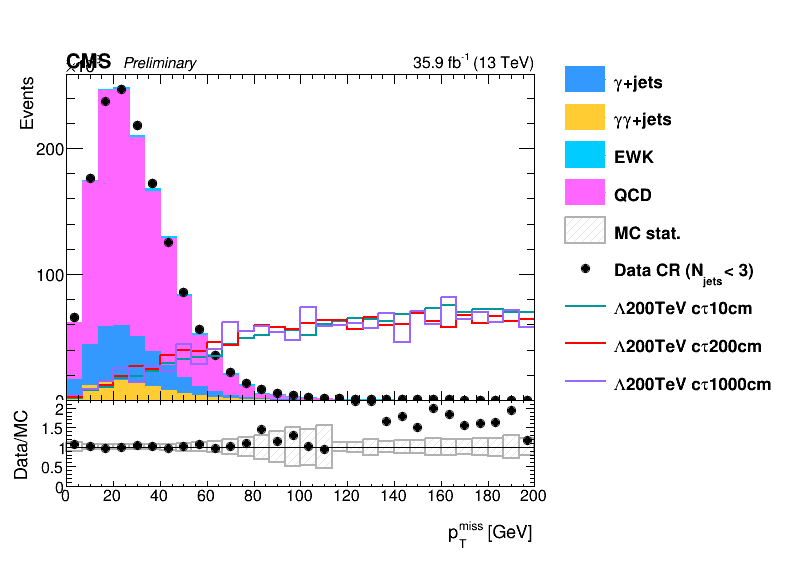

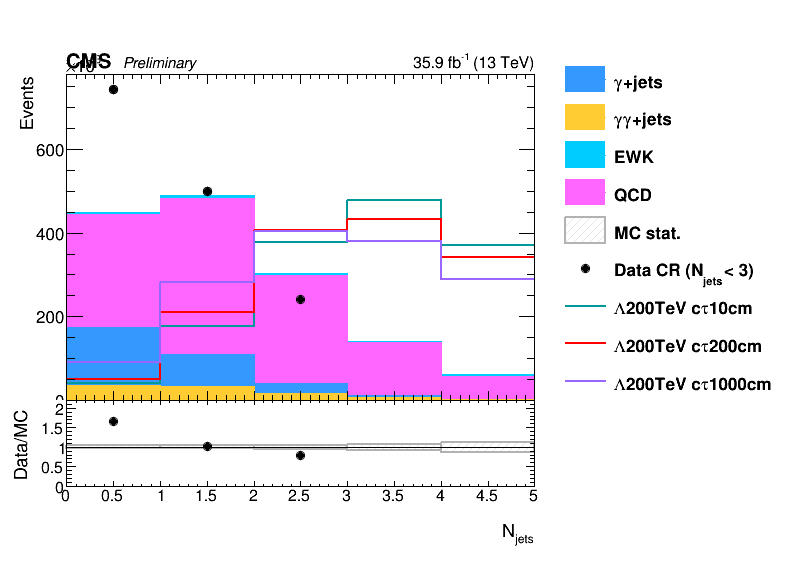

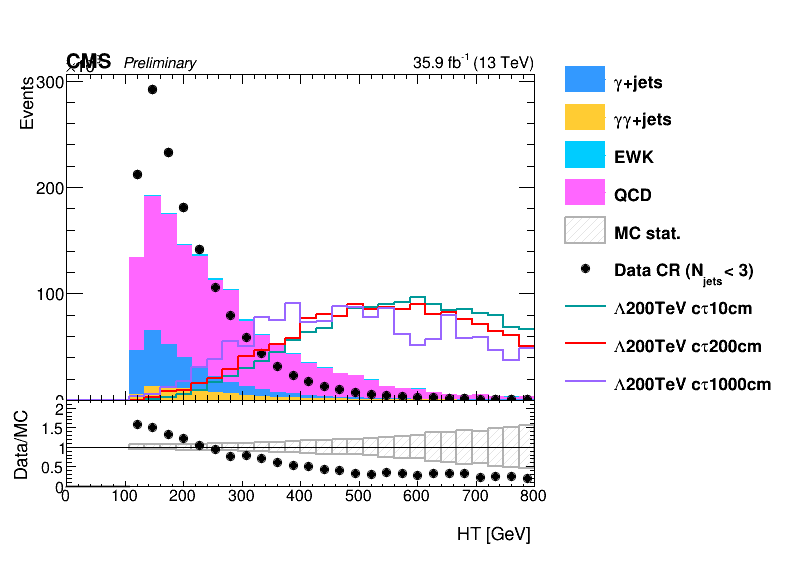

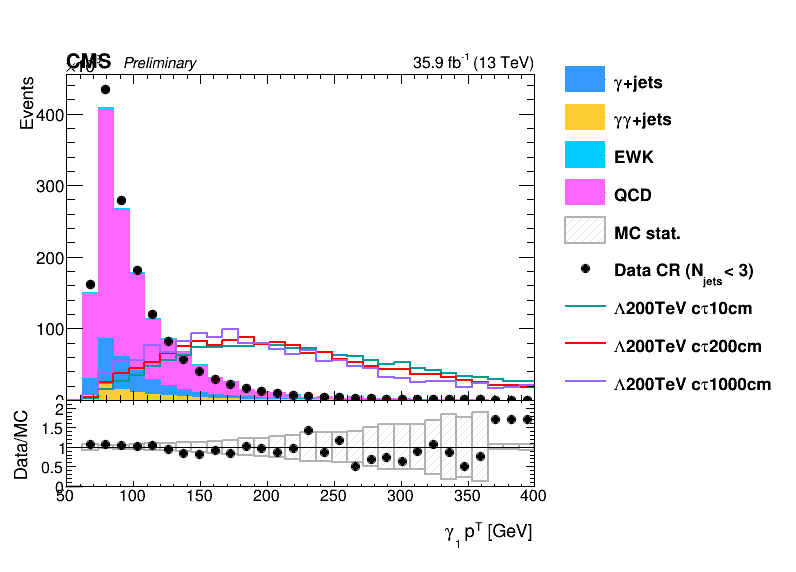

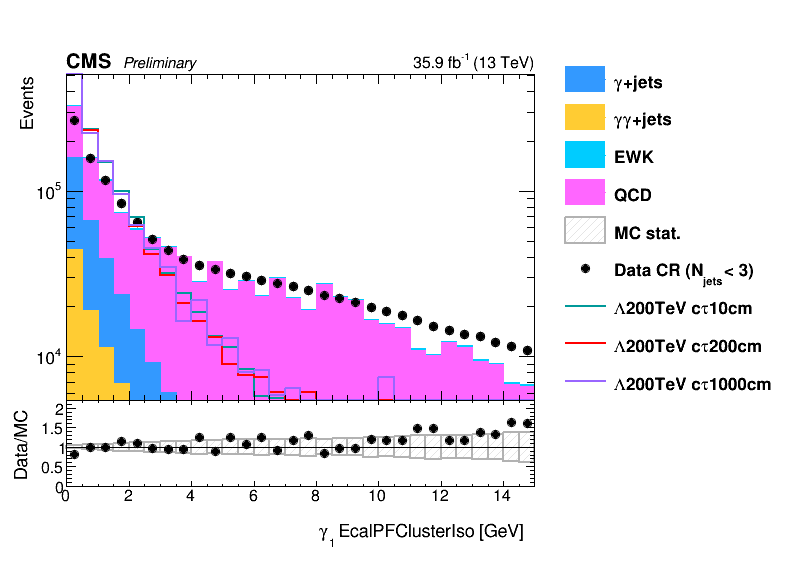

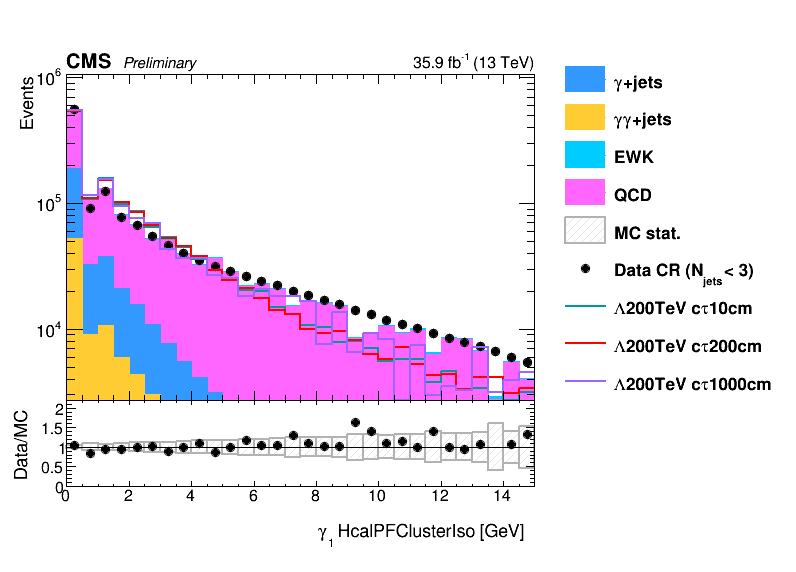

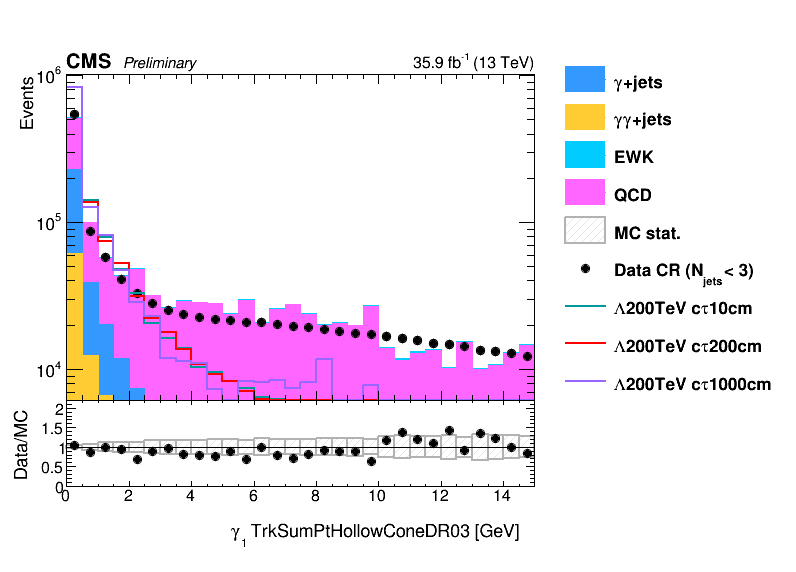

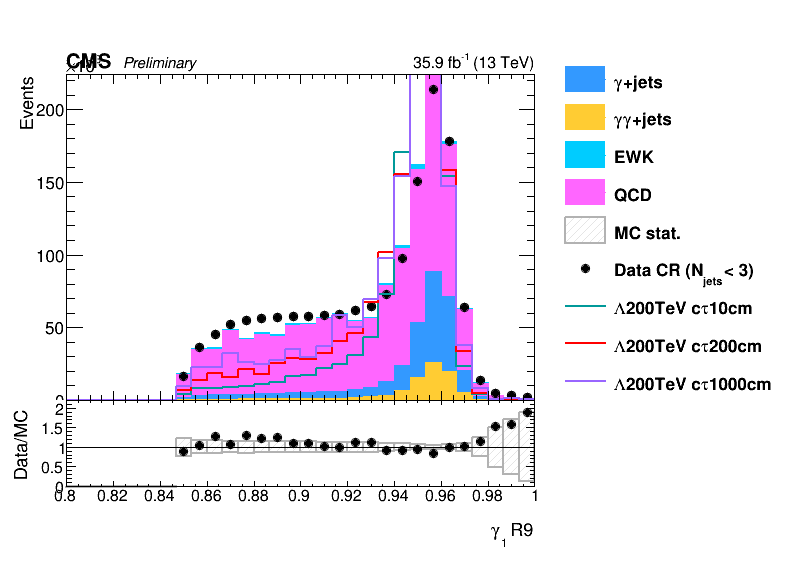

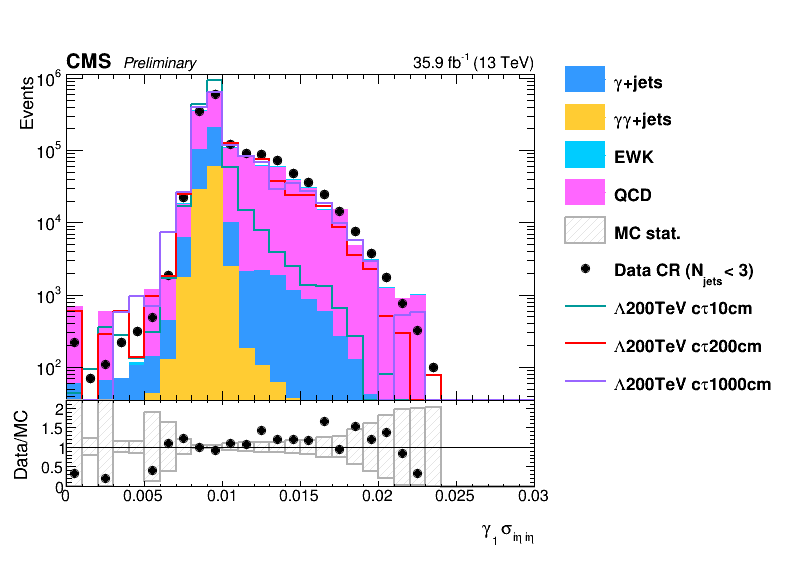

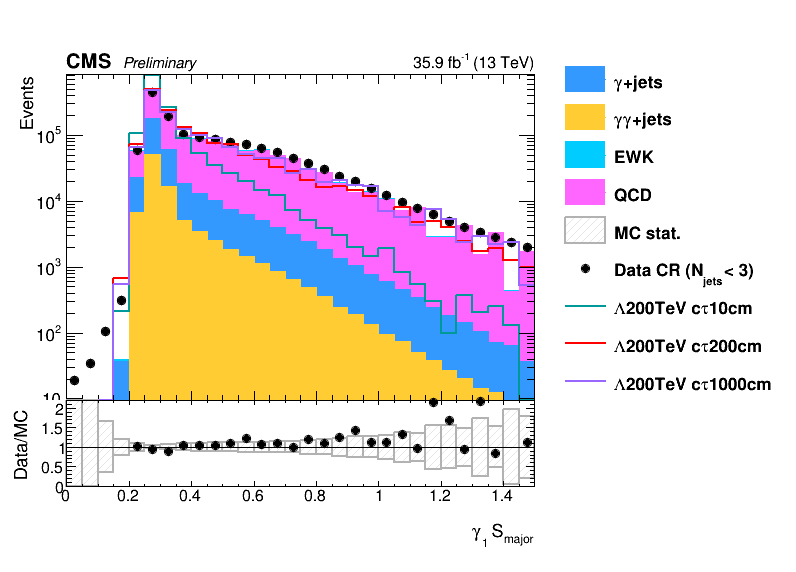

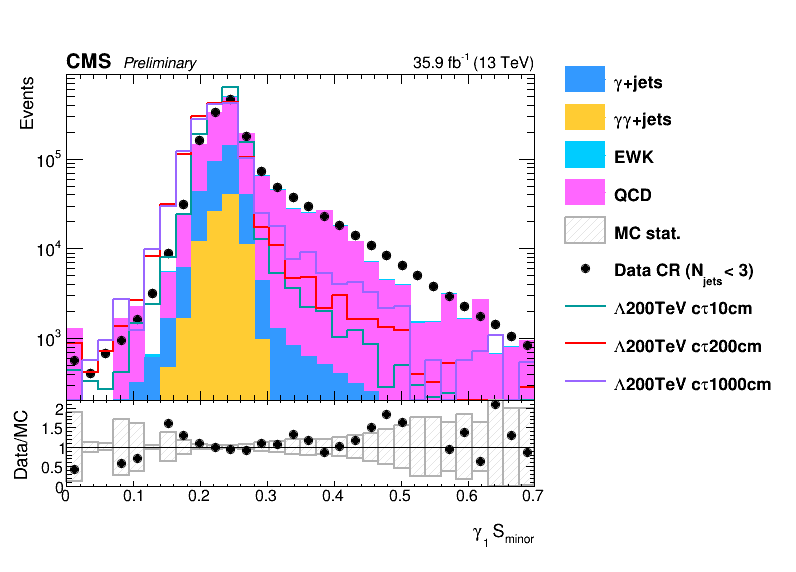

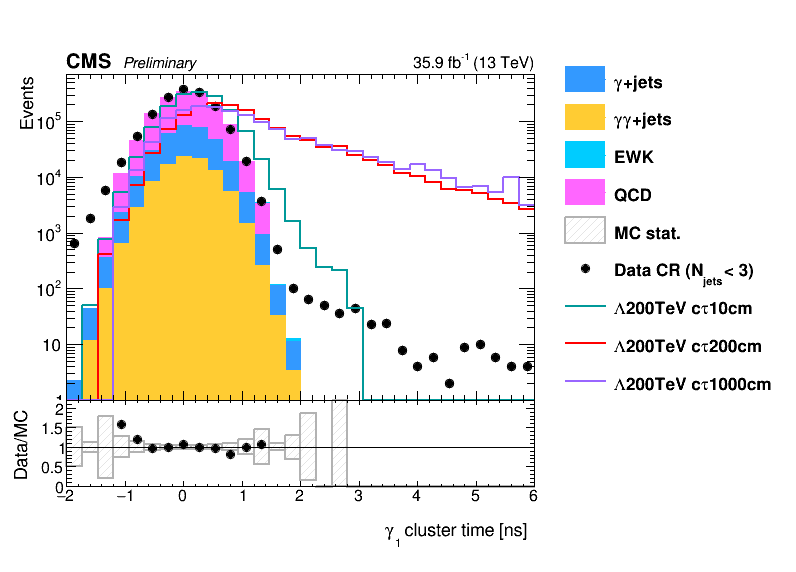

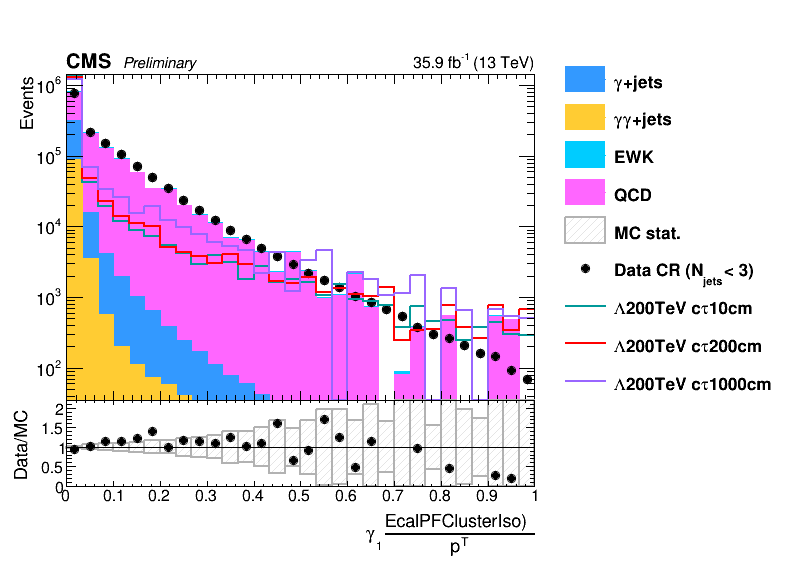

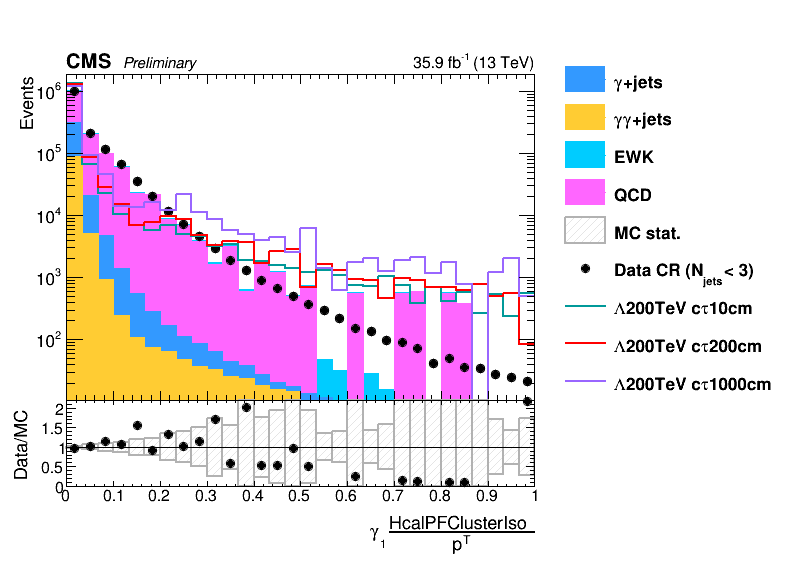

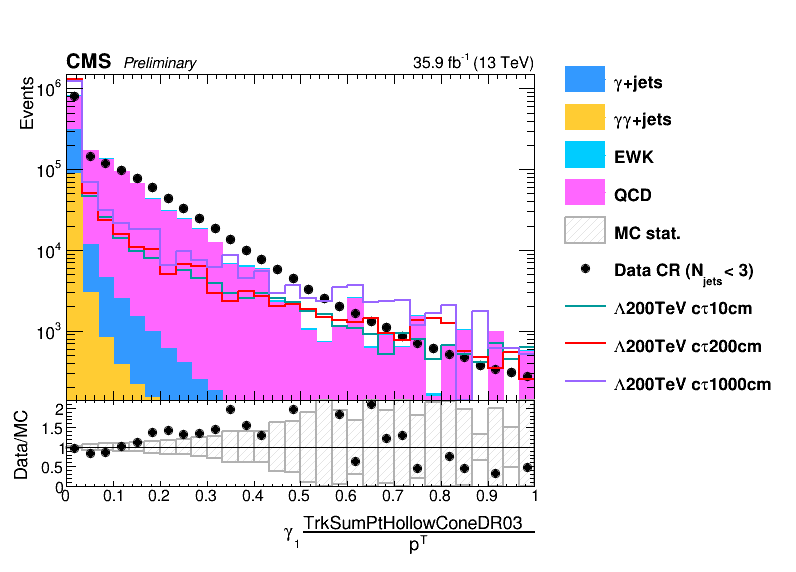

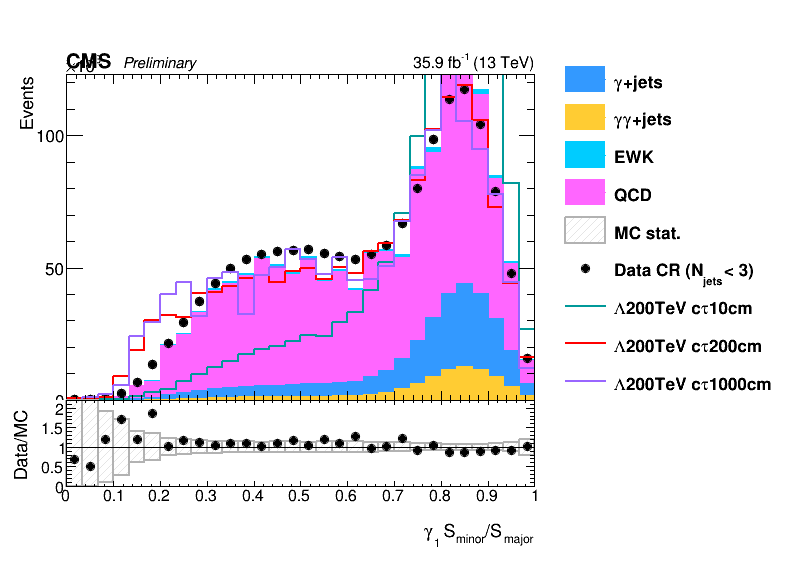

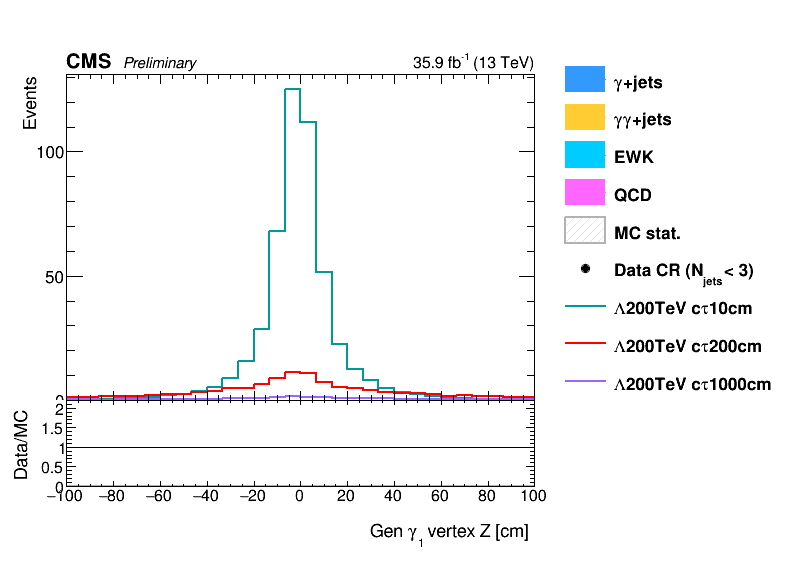

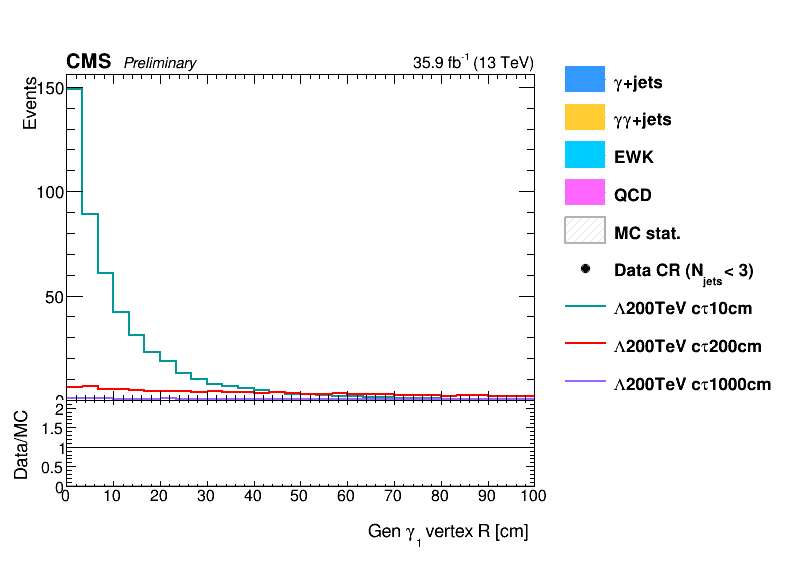

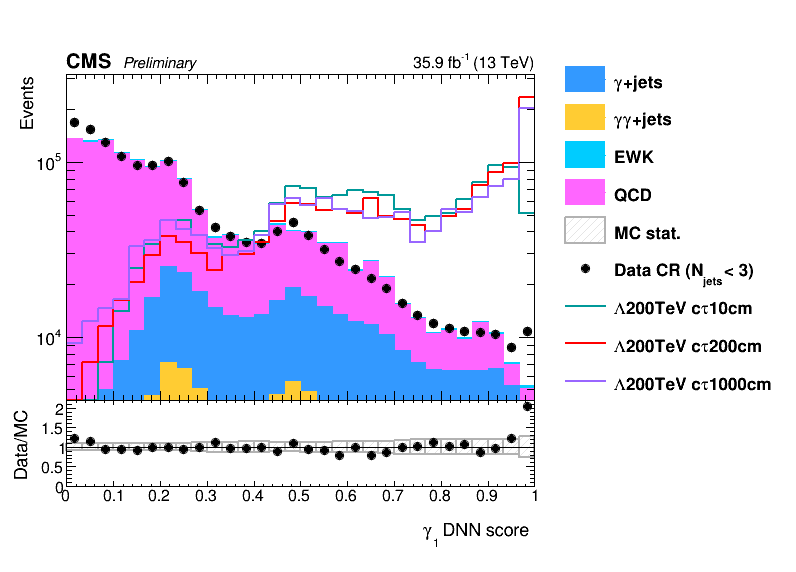

In [23]:
#### import plotLib.CMS_lumi as CMS_lumi
import plotLib.tdrstyle as tdrstyle
import plotLib.CMS_lumi as CMS_lumi

tdrstyle.setTDRStyle()

rt.gStyle.SetOptStat(0)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation Preliminary"
CMS_lumi.lumi_sqrtS = "35.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)

iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12

H_ref = 600;
W_ref = 800;
W = W_ref
H  = H_ref
iPeriod = 0

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref
L = 0.12*W_ref
R = 0.04*W_ref


c1 = {}
leg = {}
h_dummy = {}
pad1 = {}
pad2 = {}
pad3 = {}
hsum = {}
hr = {}
hr_mc = {}
hr_clone = {}
hline = {}
for i, fea in enumerate(features):
    c1[fea] = rt.TCanvas("c1[{}]".format(fea),"",50, 50, W, H)
    c1[fea].cd()
    c1[fea].SetFillColor(0)
    c1[fea].SetBorderMode(0)
    c1[fea].SetFrameFillStyle(0)
    c1[fea].SetFrameBorderMode(0)
    
    c1[fea].SetTickx(0)
    c1[fea].SetTicky(0)
    rt.gStyle.SetOptStat(0)
    
    pad1[fea] = rt.TPad("pad1[{}]".format(fea), "", 0, 0.3, 0.7, 0.92)
    pad1[fea].SetLeftMargin( L/W )
    pad1[fea].SetRightMargin( R/W )
    pad1[fea].SetTopMargin( T/H )
    pad1[fea].SetBottomMargin(0)
    
    #pad1[fea].SetGridx()
    pad1[fea].Draw()
    pad1[fea].cd()


    #data_hist[fea].Draw('p hist')
    hsum[fea] = hstack[fea].GetStack().Last()
    if hsum[fea].Integral() > 0:
        print(hsum[fea].Integral())
        data_hist[fea].SetMarkerSize(1)
        data_hist[fea].GetXaxis().LabelsOption("v")
        data_hist[fea].Draw("p hist")
        hstack[fea].Draw("hist same")
        
        data_hist[fea].Draw('p hist same')

        data_hist[fea].SetName("")
        data_hist[fea].GetXaxis().SetTitle(feature_names[fea])
        data_hist[fea].GetXaxis().SetTitleSize(0.05)

        for sig in signal_hist_list[fea]:
            sig.Scale(hsum[fea].Integral()/sig.Integral())
            sig.Draw("hist same")
            
        data_hist[fea].GetYaxis().SetTitle("Events");
        data_hist[fea].GetYaxis().SetNdivisions(505);
        data_hist[fea].GetYaxis().SetTitleSize(20);
        data_hist[fea].GetYaxis().SetTitleFont(43);
        data_hist[fea].GetYaxis().SetTitleOffset(1.5);
        data_hist[fea].GetYaxis().SetLabelFont(43);
        data_hist[fea].GetYaxis().SetLabelSize(18);
    else:
        signal_hist_list[fea][0].Draw("hist")
        for sig in signal_hist_list[fea]:
            sig.Draw("hist same")
        signal_hist_list[fea][0].GetXaxis().SetTitle(feature_names[fea])
        signal_hist_list[fea][0].GetXaxis().SetTitleSize(0.05)
        signal_hist_list[fea][0].GetYaxis().SetTitle("Events");
        signal_hist_list[fea][0].GetYaxis().SetNdivisions(505);
        signal_hist_list[fea][0].GetYaxis().SetTitleSize(20);
        signal_hist_list[fea][0].GetYaxis().SetTitleFont(43);
        signal_hist_list[fea][0].GetYaxis().SetTitleOffset(1.2);
        signal_hist_list[fea][0].GetYaxis().SetLabelFont(43);
        signal_hist_list[fea][0].GetYaxis().SetLabelSize(18);

    data_hist[fea].GetYaxis().SetTitle("Events");
    data_hist[fea].GetYaxis().SetNdivisions(505);
    data_hist[fea].GetYaxis().SetTitleSize(20);
    data_hist[fea].GetYaxis().SetTitleFont(43);
    data_hist[fea].GetYaxis().SetTitleOffset(1.3);
    data_hist[fea].GetYaxis().SetLabelFont(43); 
    data_hist[fea].GetYaxis().SetLabelSize(18);

#     signal_hist[fea].Draw("L same")
#     allsn_hist[fea].Draw("L same")
    
    if fea in useLogY:
        if useLogY[fea]:
            rt.gPad.SetLogy()
    rt.gStyle.SetOptStat(0)
    pad1[fea].RedrawAxis();
    c1[fea].Draw()
    
    #draw the lumi text on the c1[fea]
    latex = rt.TLatex()
    latex.SetTextFont(42)
    latex.SetTextAngle(0)
    latex.SetTextColor(rt.kBlack)
    latex.SetTextSize(0.035)
    latex.SetTextAlign(12)
    CMS_lumi.extraText = "Preliminary"
    CMS_lumi.CMS_lumi(pad1[fea], iPeriod, iPos)
#     if fea == 'pho1DNN':
#         latex.DrawLatexNDC(0.14, 0.85,"with adversarial")
    
    
    c1[fea].Draw()
    c1[fea].cd()
    
    # ratio plot
    ### Draw the ratio plot
    pad2[fea] = rt.TPad("pad2[{}]".format(fea), "", 0, 0.00, 0.7, 0.3);
    pad2[fea].SetTopMargin(0);
    pad2[fea].SetLeftMargin( L/W )
    pad2[fea].SetRightMargin( R/W )
    pad2[fea].SetBottomMargin( 0.5 )
    #pad2[fea].SetGrid()
    pad2[fea].Draw()
    pad2[fea].cd()

    
    hr_mc[fea] = hsum[fea].Clone("hr_mc[fea]");
    hr[fea] = data_hist[fea].Clone('hr[fea]')
    hr[fea].Sumw2()
    hr_mc[fea].SetLineColor(rt.kBlack);
    hr_mc[fea].SetMinimum(0.)
    hr_mc[fea].SetMaximum(2.2)
    hr_mc[fea].Sumw2()
    hr_mc[fea].SetStats(0)
    hr_mc[fea].Divide(hsum[fea])
    hr_mc[fea].SetFillColor(18)
    hr_mc[fea].SetLineColor(16)
    hr_mc[fea].SetLineWidth(2)
    hr_mc[fea].SetFillStyle(3004)
    hr_mc[fea].GetXaxis().SetTitle(feature_names[fea])

    hr_mc[fea].Draw("e2")
    hr_clone[fea] = hr_mc[fea].Clone("clone")
    hr_clone[fea].Sumw2()
    hr_clone[fea].SetFillColor(0)
    hr_clone[fea].SetFillStyle(0)
    hr_clone[fea].SetLineColor(16)
    hr_clone[fea].SetLineWidth(2)

    hr_clone[fea].Draw("e2 same")
    hr[fea].Divide(hsum[fea])
    hr[fea].Draw("hist p same")

    hr[fea].SetMarkerStyle(20)
    hline[fea] = rt.TLine(hr_clone[fea].GetXaxis().GetXmin(),1,hr_clone[fea].GetXaxis().GetXmax(),1)
    hline[fea].Draw()
    hr_mc[fea].GetYaxis().SetTitle("Data/MC");
    hr_mc[fea].GetYaxis().CenterTitle();
    hr_mc[fea].GetYaxis().SetNdivisions(505);
    hr_mc[fea].GetYaxis().SetTitleSize(20);
    hr_mc[fea].GetYaxis().SetTitleFont(43);
    hr_mc[fea].GetYaxis().SetTitleOffset(1.5);
    hr_mc[fea].GetYaxis().SetLabelFont(43); 
    hr_mc[fea].GetYaxis().SetLabelSize(18);

    # X axis ratio plot settings
    hr_mc[fea].GetXaxis().SetTitleSize(20);
    hr_mc[fea].GetXaxis().SetTitleFont(43);
    hr_mc[fea].GetXaxis().SetTitleOffset(5.);
    hr_mc[fea].GetXaxis().SetLabelFont(43);
    hr_mc[fea].GetXaxis().SetLabelSize(18)
    pad2[fea].RedrawAxis();
    c1[fea].cd()
    
    # Legend pad
    pad3[fea] = rt.TPad("pad3[{}]".format(fea), "", 0.7, 0.3, 0.99, 0.9)
    pad3[fea].SetTopMargin(0.0)
    pad3[fea].SetLeftMargin(0.0)

    pad3[fea].SetBottomMargin(0.)
    pad3[fea].Draw()
    pad3[fea].cd()
    leg[fea] = rt.TLegend(0.0,0.,0.99,0.99)
    leg[fea].SetBorderSize(0)
    leg[fea].AddEntry(hist_list[fea][sample_index['GJet']], "#gamma+jets", "fl")
    leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma+jets", "fl")
    leg[fea].AddEntry(hist_list[fea][sample_index['Z']], "EWK", "fl")
    leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "fl")
    leg[fea].AddEntry(hr_mc[fea], "MC stat.", "f")
    leg[fea].AddEntry(data_hist[fea], "Data CR (N_{jets}< 3)", "p")


    for sig in signal_hist_list[fea]:
        name = sig.GetName()
        this_lambda = name.split('_')[-2]
        this_ctau = name.split('_')[-1]
        leg[fea].AddEntry(sig, "#Lambda"+str(this_lambda)+"TeV c#tau"+str(this_ctau)+"cm", "l")
    
    # leg[fea].AddEntry(signal_hist[fea], "GMSB #Lambda = 300 TeV, c#tau = 200cm (x50k)", "l")
    # leg[fea].AddEntry(allsn_hist[fea], "GMSB combined (#Lambda #geq 200 TeV)", "l")
    leg[fea].Draw()
    
    
    c1[fea].Update()
    c1[fea].RedrawAxis()
#     frame = c1[fea].GetFrame()
#     frame.Draw()
    
    



In [8]:
# # Canvas for legend
# rt.gStyle.SetOptStat(0)

# fea = features[-1]
# cleg = rt.TCanvas("cleg", "", 50, 50, W, H)
# cleg.cd()
# leg[fea] = rt.TLegend(0.1,0.2,0.89,0.89)
# leg[fea].SetBorderSize(0)
# leg[fea].AddEntry(hist_list[fea][sample_index['GJet']], "#gamma+jets", "fl")
# leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma+jets", "fl")
# leg[fea].AddEntry(hist_list[fea][sample_index['Z']], "EWK", "fl")
# leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "fl")
# data_hist[fea].SetMarkerSize(3)
# leg[fea].AddEntry(data_hist[fea], "Data CR", "p")
# leg[fea].AddEntry(hr_mc[fea], "MC stat.", "f")
# # leg[fea].AddEntry(signal_hist[fea], "GMSB #Lambda = 300 TeV, c#tau = 200cm (x50k)", "l")
# # leg[fea].AddEntry(allsn_hist[fea], "GMSB combined (#Lambda #geq 200 TeV)", "l")
# leg[fea].Draw()
# cleg.Draw()

In [9]:
# #### import plotLib.CMS_lumi as CMS_lumi
# import plotLib.tdrstyle as tdrstyle
# import plotLib.CMS_lumi as CMS_lumi

# tdrstyle.setTDRStyle()

# rt.gStyle.SetOptStat(0)
# #change the CMS_lumi variables (see CMS_lumi.py)
# CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
# CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
# CMS_lumi.writeExtraText = 1
# CMS_lumi.extraText = "Simulation Preliminary"
# CMS_lumi.lumi_sqrtS = "35.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)

# iPos = 0
# if( iPos==0 ): CMS_lumi.relPosX = 0.12

# H_ref = 600;
# W_ref = 800;
# W = W_ref
# H  = H_ref
# iPeriod = 0

# # references for T, B, L, R
# T = 0.08*H_ref
# B = 0.12*H_ref
# L = 0.12*W_ref
# R = 0.04*W_ref


# c1 = {}
# leg = {}
# h_dummy = {}
# for i, fea in enumerate(features):
#     c1[fea] = rt.TCanvas("c1[{}]".format(fea),"",50, 50, W, H)
#     c1[fea].cd()
#     c1[fea].SetFillColor(0)
#     c1[fea].SetBorderMode(0)
#     c1[fea].SetFrameFillStyle(0)
#     c1[fea].SetFrameBorderMode(0)
#     c1[fea].SetLeftMargin( L/W )
#     c1[fea].SetRightMargin( R/W )
#     c1[fea].SetTopMargin( T/H )
#     c1[fea].SetBottomMargin( B/H )
#     c1[fea].SetTickx(0)
#     c1[fea].SetTicky(0)
#     rt.gStyle.SetOptStat(0)
# #     h_dummy[fea] = signal_hist[fea].Clone("dummy{}".format(fea));
# #     h_dummy[fea].SetTitle("")
# #     h_dummy[fea].SetLineColor(0);
# #     h_dummy[fea].SetFillColor(0);
# #     h_dummy[fea].SetMarkerColor(0)
# #     h_dummy[fea].GetYaxis().SetTitleOffset(1.1)
# #     h_dummy[fea].SetDirectory(0)
# #     # Get max Y
# #     hsum = hstack[fea].GetStack().Last()
# #     maxY = max([hsum.GetMaximum(), signal_hist[fea].GetMaximum(), allsn_hist[fea].GetMaximum()])
# #     h_dummy[fea].SetAxisRange(1e-1,maxY*1.3,"Y")
# #     h_dummy[fea].Draw()
#     norm_data = data_hist.Clone()
#     norm_data.Scale(1./data_hist.Integral())
#     norm_data.Draw('lep')
    
#     sumh = hstack[fea].GetStack().Last()
#     sumh.Scale(1./sumh.Integral())
#     sumh.SetMarkerColor(rt.kRed)
#     sumh.SetLineColor(rt.kRed)
#     sumh.Draw("lep same")
# #     hstack[fea].SetName("")
# #     hstack[fea].GetXaxis().SetTitle(fea)
# #     hstack[fea].GetXaxis().SetTitleSize(0.05)
    
# #     signal_hist[fea].Draw("L same")
# #     allsn_hist[fea].Draw("L same")
    
#     if useLogY[fea]:
#         rt.gPad.SetLogy()
#     rt.gStyle.SetOptStat(0)
#     if i==0:
#         leg[fea] = rt.TLegend(0.6,0.6,0.89,0.89)
#         leg[fea].SetBorderSize(0)
# #         leg[fea].AddEntry(hist_list[fea][sample_index['GJets']], "#gamma + jets", "f")
# #         leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma + jets", "f")
#         leg[fea].AddEntry(sumh, "MC", "lep")
#         leg[fea].AddEntry(data_hist, "Data", "lep")
# #         leg[fea].AddEntry(signal_hist[fea], "GMSB #Lambda = 300 TeV, c#tau = 200cm (x50k)", "l")
# #         leg[fea].AddEntry(allsn_hist[fea], "GMSB combined (#Lambda #geq 200 TeV)", "l")
#         leg[fea].Draw()
#     c1[fea].Draw()
    
#     #draw the lumi text on the c1[fea]
#     latex = rt.TLatex()
#     latex.SetTextFont(42)
#     latex.SetTextAngle(0)
#     latex.SetTextColor(rt.kBlack)
#     latex.SetTextSize(0.06)
#     latex.SetTextAlign(12)
#     CMS_lumi.extraText = "Preliminary"
#     CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)
#     xpos = 100
#     ypos = 3000
#     latex.DrawLatex(xpos, ypos,"| #gamma^{1}_{time}| < 1.0")
    
#     #draw the lumi text on the c1[fea]
#     CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)

#     c1[fea].cd()
#     c1[fea].Update()
#     c1[fea].RedrawAxis()
#     frame = c1[fea].GetFrame()
#     frame.Draw()
    
    

# # # Canvas for legend
# # rt.gStyle.SetOptStat(0)

# # fea = features[-1]
# # cleg = rt.TCanvas("cleg", "", 50, 50, W, H)
# # cleg.cd()
# # leg[fea] = rt.TLegend(0.1,0.2,0.89,0.89)
# # leg[fea].SetBorderSize(0)
# # leg[fea].AddEntry(hist_list[fea][sample_index['GJets']], "#gamma + jets", "f")
# # leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma + jets", "f")
# # leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "f")
# # # leg[fea].AddEntry(signal_hist[fea], "GMSB #Lambda = 300 TeV, c#tau = 200cm (x50k)", "l")
# # # leg[fea].AddEntry(allsn_hist[fea], "GMSB combined (#Lambda #geq 200 TeV)", "l")
# # leg[fea].Draw()
# # cleg.Draw()

In [10]:

# for i, fea in enumerate(features):
#     if fea != 'pho1DNN': continue
#     c1[fea] = rt.TCanvas("c1[{}]".format(fea),"",50, 50, W, H)
#     c1[fea].cd()
#     c1[fea].SetFillColor(0)
#     c1[fea].SetBorderMode(0)
#     c1[fea].SetFrameFillStyle(0)
#     c1[fea].SetFrameBorderMode(0)
#     c1[fea].SetLeftMargin( L/W )
#     c1[fea].SetRightMargin( R/W )
#     c1[fea].SetTopMargin( T/H )
#     c1[fea].SetBottomMargin( B/H )
#     c1[fea].SetTickx(0)
#     c1[fea].SetTicky(0)
#     rt.gStyle.SetOptStat(0)
# #     h_dummy[fea] = signal_hist[fea].Clone("dummy{}".format(fea));
# #     h_dummy[fea].SetTitle("")
# #     h_dummy[fea].SetLineColor(0);
# #     h_dummy[fea].SetFillColor(0);
# #     h_dummy[fea].SetMarkerColor(0)
# #     h_dummy[fea].GetYaxis().SetTitleOffset(1.1)
# #     h_dummy[fea].SetDirectory(0)
# #     # Get max Y
# #     hsum = hstack[fea].GetStack().Last()
# #     maxY = max([hsum.GetMaximum(), signal_hist[fea].GetMaximum(), allsn_hist[fea].GetMaximum()])
# #     h_dummy[fea].SetAxisRange(1e-1,maxY*1.3,"Y")
# #     h_dummy[fea].Draw()

#     #data_hist[fea].Draw('lep')
#     hstack[fea].Draw("hist ")
#     hstack[fea].SetName("")
#     hstack[fea].GetXaxis().SetTitle(fea)
#     hstack[fea].GetXaxis().SetTitleSize(0.05)
    
# #     signal_hist[fea].Draw("L same")
# #     allsn_hist[fea].Draw("L same")
    
#     if useLogY[fea]:
#         rt.gPad.SetLogy()
#     rt.gStyle.SetOptStat(0)
#     if i==0:
#         leg[fea] = rt.TLegend(0.6,0.6,0.89,0.89)
#         leg[fea].SetBorderSize(0)
#         leg[fea].AddEntry(hist_list[fea][sample_index['GJets']], "#gamma + jets", "f")
#         leg[fea].AddEntry(hist_list[fea][sample_index['DiPhoton']], "#gamma#gamma + jets", "f")
#         leg[fea].AddEntry(hist_list[fea][sample_index['QCD']], "QCD", "f")
#         leg[fea].AddEntry(data_hist[fea], "Data", "lep")
# #         leg[fea].AddEntry(signal_hist[fea], "GMSB #Lambda = 300 TeV, c#tau = 200cm (x50k)", "l")
# #         leg[fea].AddEntry(allsn_hist[fea], "GMSB combined (#Lambda #geq 200 TeV)", "l")
#         leg[fea].Draw()
#     c1[fea].Draw()
    
#     #draw the lumi text on the c1[fea]
#     latex = rt.TLatex()
#     latex.SetTextFont(42)
#     latex.SetTextAngle(0)
#     latex.SetTextColor(rt.kBlack)
#     latex.SetTextSize(0.06)
#     latex.SetTextAlign(12)
#     CMS_lumi.extraText = "Preliminary"
#     CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)
    
#     latex.DrawLatex(textPosition[fea][0], textPosition[fea][1],"| #gamma^{1}_{time}| < 1.0")
    
#     #draw the lumi text on the c1[fea]
#     CMS_lumi.CMS_lumi(c1[fea], iPeriod, iPos)

#     c1[fea].cd()
#     c1[fea].Update()
#     c1[fea].RedrawAxis()
#     frame = c1[fea].GetFrame()
#     frame.Draw()
    